<a href="https://colab.research.google.com/github/martinclehman/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/NBA_salary_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("NBA_season1718_salary.csv")

In [0]:
df2 = pd.read_csv("stats_adv.txt")

In [187]:
df.head()

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [188]:
df2.head(5)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Álex Abrines\abrinal01,SG,25,OKC,31,588,6.3,0.507,0.809,0.083,0.9,7.8,4.2,4.3,1.3,0.9,7.9,12.2,NaN,0.1,0.6,0.6,0.053,NaN,-2.4,-0.9,-3.4,-0.2
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,123,2.9,0.379,0.833,0.556,2.7,20.1,11.3,8.2,0.4,2.7,15.2,9.2,NaN,-0.1,0.0,-0.1,-0.022,NaN,-5.7,-0.3,-5.9,-0.1
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,428,7.6,0.474,0.673,0.082,2.6,12.3,7.4,19.8,1.5,1.0,19.7,13.5,NaN,-0.1,0.2,0.1,0.011,NaN,-3.1,-1.3,-4.4,-0.3
3,4,Steven Adams\adamsst01,C,25,OKC,80,2669,18.5,0.591,0.002,0.361,14.7,14.8,14.7,6.6,2.0,2.4,12.6,16.4,NaN,5.1,4.0,9.1,0.163,NaN,0.6,2.1,2.7,3.2
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,1913,17.9,0.623,0.031,0.465,9.2,24.0,16.6,14.2,1.8,3.0,17.1,15.8,NaN,3.4,3.4,6.8,0.171,NaN,-0.6,3.6,3.0,2.4


In [189]:
df2.shape

(708, 29)

In [190]:
#Clean up 'Player' Feature to keep name
df2['Player'] = df2['Player'].apply(lambda x: x.split('\\',1)[0])
df2['Player'].head(5)

0    Álex Abrines
1      Quincy Acy
2    Jaylen Adams
3    Steven Adams
4     Bam Adebayo
Name: Player, dtype: object

In [191]:
# Need to drop duplicate data when player is traded mid-season to play for multiple teams
df2[15:18]

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
15,16,Ryan Anderson,PF,30,TOT,25,322,4.6,0.414,0.580,0.232,6.1,12.5,9.2,7.8,0.6,0.3,15.5,12.0,NaN,-0.3,0.0,-0.2,-0.035,NaN,-4.5,-2.0,-6.4,-0.4
16,16,Ryan Anderson,PF,30,PHO,15,278,4.6,0.423,0.567,0.233,5.5,12.5,9.0,8.1,0.5,0.3,15.4,12.1,NaN,-0.2,0.0,-0.2,-0.039,NaN,-4.4,-2.1,-6.5,-0.3
17,16,Ryan Anderson,PF,30,MIA,10,44,4.5,0.354,0.667,0.222,9.7,12.1,10.9,5.8,1.1,0.0,16.8,11.6,NaN,0.0,0.0,0.0,-0.009,NaN,-4.9,-0.8,-5.8,0.0


In [0]:
df2['Player'] = df2['Player'].drop_duplicates('first')

In [193]:
df2.isna().sum()

Rk               0
Player         178
Pos              0
Age              0
Tm               0
G                0
MP               0
PER              0
TS%              6
3PAr             6
FTr              6
ORB%             0
DRB%             0
TRB%             0
AST%             0
STL%             0
BLK%             0
TOV%             6
USG%             0
Unnamed: 19    708
OWS              0
DWS              0
WS               0
WS/48            0
Unnamed: 24    708
OBPM             0
DBPM             0
BPM              0
VORP             0
dtype: int64

In [0]:
# Remove NaN columns
df2 = df2.dropna(axis=1,how='all')

In [0]:
# Remove rows with NaN's
df2 = df2.dropna()

In [196]:
df2[15:18]

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
15,16,Ryan Anderson,PF,30,TOT,25,322,4.6,0.414,0.580,0.232,6.1,12.5,9.2,7.8,0.6,0.3,15.5,12.0,-0.3,0.0,-0.2,-0.035,-4.5,-2.0,-6.4,-0.4
18,17,Ike Anigbogu,C,20,IND,3,6,-6.0,0.000,0.000,0.000,18.9,36.2,27.7,19.4,0.0,14.8,25.0,29.1,-0.1,0.0,-0.1,-0.480,-22.5,8.5,-14.0,0.0
19,18,Giannis Antetokounmpo,PF,24,MIL,72,2358,30.9,0.644,0.163,0.550,7.3,30.0,19.3,30.3,1.8,3.9,14.8,32.3,8.9,5.5,14.4,0.292,5.7,5.0,10.8,7.6


In [197]:
df2.shape

(526, 27)

In [198]:
df2.tail(5)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
699,526,Trae Young,PG,20,ATL,81,2503,17.0,0.539,0.384,0.330,2.6,10.2,6.3,40.5,1.3,0.5,17.6,28.4,2.5,0.7,3.3,0.062,1.8,-2.8,-1.1,0.6
700,527,Cody Zeller,C,26,CHO,49,1243,17.2,0.611,0.064,0.409,9.4,19.7,14.5,12.1,1.5,2.9,13.2,16.3,2.6,1.2,3.9,0.150,0.2,1.7,2.0,1.2
701,528,Tyler Zeller,C,29,TOT,6,93,17.3,0.607,0.033,0.600,12.9,15.7,14.2,6.7,0.5,3.1,9.5,20.1,0.2,0.1,0.3,0.167,-1.0,-1.2,-2.2,0.0
704,529,Ante Žižić,C,22,CLE,59,1082,16.2,0.590,0.000,0.399,10.6,22.8,16.4,7.7,0.6,1.8,13.6,18.2,1.7,0.3,2.0,0.087,-1.7,-1.4,-3.1,-0.3
705,530,Ivica Zubac,C,21,TOT,59,1040,18.9,0.604,0.000,0.332,11.9,24.2,18.2,9.1,0.6,4.0,13.9,20.3,1.9,1.3,3.2,0.148,-1.2,1.0,-0.3,0.5


In [199]:
df2.shape

(526, 27)

In [0]:
merged = pd.merge(df,df2,how='inner', on='Player')

In [201]:
merged.head()

,Unnamed: 0,Player,Tm_x,season17_18,Rk,Pos,Age,Tm_y,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Stephen Curry,GSW,34682550.0,124,PG,30,GSW,69,2331,24.4,0.641,0.604,0.214,2.2,14.2,8.4,24.2,1.9,0.9,11.6,30.4,7.2,2.5,9.7,0.199,7.7,-1.4,6.3,4.9
1,2,LeBron James,CLE,33285709.0,258,SF,34,LAL,55,1937,25.6,0.588,0.299,0.382,3.1,21.3,12.4,39.4,1.7,1.4,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9
2,3,Paul Millsap,DEN,31269231.0,351,PF,33,DEN,70,1895,17.9,0.570,0.239,0.374,8.7,20.2,14.4,10.6,2.2,2.5,10.9,19.6,3.2,2.9,6.1,0.155,0.5,1.9,2.4,2.1
3,4,Gordon Hayward,BOS,29727900.0,218,PF,28,BOS,72,1863,15.6,0.575,0.364,0.294,2.9,15.5,9.2,18.4,1.6,1.1,12.8,19.0,2.6,2.3,4.9,0.126,0.1,0.4,0.5,1.2
4,5,Blake Griffin,DET,29512900.0,202,PF,29,DET,75,2622,21.0,0.581,0.389,0.410,4.0,20.1,11.8,27.1,1.0,0.9,13.8,30.2,5.1,2.9,8.0,0.147,4.2,0.4,4.6,4.4


In [0]:
merged['season17_18'] = merged['season17_18']/1000000

In [203]:
merged = merged.rename(columns={"season17_18": "Salary"})
merged.head(5)

,Unnamed: 0,Player,Tm_x,Salary,Rk,Pos,Age,Tm_y,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Stephen Curry,GSW,34.682550,124,PG,30,GSW,69,2331,24.4,0.641,0.604,0.214,2.2,14.2,8.4,24.2,1.9,0.9,11.6,30.4,7.2,2.5,9.7,0.199,7.7,-1.4,6.3,4.9
1,2,LeBron James,CLE,33.285709,258,SF,34,LAL,55,1937,25.6,0.588,0.299,0.382,3.1,21.3,12.4,39.4,1.7,1.4,13.3,31.6,4.7,2.6,7.2,0.179,6.2,1.9,8.1,4.9
2,3,Paul Millsap,DEN,31.269231,351,PF,33,DEN,70,1895,17.9,0.570,0.239,0.374,8.7,20.2,14.4,10.6,2.2,2.5,10.9,19.6,3.2,2.9,6.1,0.155,0.5,1.9,2.4,2.1
3,4,Gordon Hayward,BOS,29.727900,218,PF,28,BOS,72,1863,15.6,0.575,0.364,0.294,2.9,15.5,9.2,18.4,1.6,1.1,12.8,19.0,2.6,2.3,4.9,0.126,0.1,0.4,0.5,1.2
4,5,Blake Griffin,DET,29.512900,202,PF,29,DET,75,2622,21.0,0.581,0.389,0.410,4.0,20.1,11.8,27.1,1.0,0.9,13.8,30.2,5.1,2.9,8.0,0.147,4.2,0.4,4.6,4.4


In [0]:
# Cut data for players having played at least 10 games
merged = merged[merged['G']>10]

I can use it to discover questions like "how correlated is performance and salary in the nba", "who is the most overpaid/underpaid player in the nba?", "is offensive skill valued at a higher premium than defensive skill?", and if more development is needed, make further inferences on team salary and success.

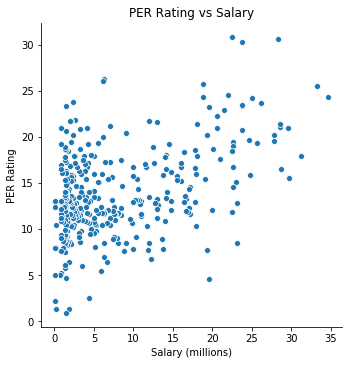

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot data
sns.relplot(x='Salary', y='PER', data=merged);

#labels
plt.title('PER Rating vs Salary')
plt.xlabel('Salary (millions)');
plt.ylabel('PER Rating');

In [224]:
merged[(merged['Salary']>15) & (merged['PER'] <10)]

,Unnamed: 0,Player,Tm_x,Salary,Rk,Pos,Age,Tm_y,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
22,25,Chandler Parsons,MEM,23.112004,396,SF,30,MEM,25,496,8.5,0.484,0.516,0.137,0.9,15.2,7.9,13.4,1.9,1.0,14.2,20.3,-0.6,0.6,0.0,-0.004,-3.7,-0.6,-4.3,-0.3
39,42,Ryan Anderson,HOU,19.578455,16,PF,30,TOT,25,322,4.6,0.414,0.580,0.232,6.1,12.5,9.2,7.8,0.6,0.3,15.5,12.0,-0.3,0.0,-0.2,-0.035,-4.5,-2.0,-6.4,-0.4
41,44,Allen Crabbe,BRK,19.332500,117,SG,26,BRK,43,1133,7.7,0.519,0.694,0.150,1.5,12.2,6.9,5.8,1.0,0.9,10.4,16.4,-0.2,1.0,0.8,0.035,-1.9,-0.5,-2.5,-0.1
